Acurácia do modelo: 0.93
Matriz de Confusão:
[[25  2]
 [ 1 12]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.86      0.92      0.89        13

    accuracy                           0.93        40
   macro avg       0.91      0.92      0.92        40
weighted avg       0.93      0.93      0.93        40



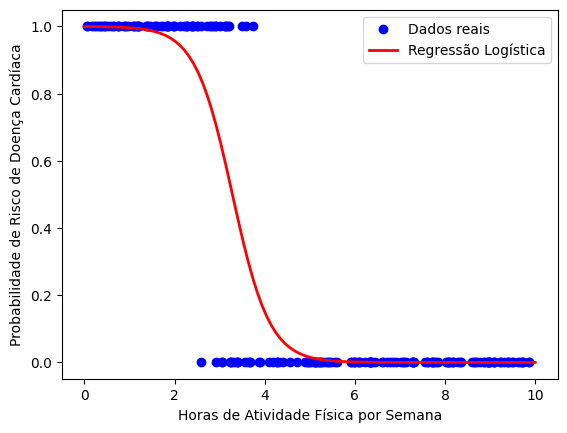

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Gerando dados simulados
np.random.seed(42)
num_samples = 200

# Horas de atividade física por semana (entre 0 e 10 horas)
hours_of_exercise = np.random.uniform(0, 10, num_samples)

# Criando rótulos (1 = risco de doença cardíaca, 0 = sem risco)
# Quanto menor a atividade física, maior a chance de risco
y = (hours_of_exercise < np.random.uniform(2, 5, num_samples)).astype(int)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(hours_of_exercise.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Criando e treinando o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Acurácia do modelo: {accuracy:.2f}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)

# Visualizando a regressão logística
x_range = np.linspace(0, 10, 100).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1]

plt.scatter(hours_of_exercise, y, color='blue', label='Dados reais')
plt.plot(x_range, y_prob, color='red', linewidth=2, label='Regressão Logística')
plt.xlabel('Horas de Atividade Física por Semana')
plt.ylabel('Probabilidade de Risco de Doença Cardíaca')
plt.legend()
plt.show()